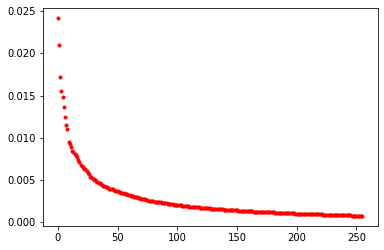

In [3]:
import sys
sys.path.append("..")
import os

import lauetools.LaueTools.IOimagefile as IOimage

import matplotlib.pyplot as plt
import numpy as np
from scipy import fft

from sklearn.metrics import silhouette_score


def reduce(im, sx, sy, lp, hp):
    SX, SY = im.shape
    im_ = im.reshape(sx, SX // sx, sy,SY // sy).mean(-1).mean(1)
    #ss=cv2.dct(im_)
    ss=fft.dctn(im_)
    ss[:lp, :] = 0.
    ss[:, :lp] = 0.
    ss[hp:, :] = 0.
    ss[:, hp:] = 0.
    #return cv2.idct(ss), ss[lp: hp, lp: hp].ravel()
    return fft.idctn(ss), ss[lp: hp, lp: hp].ravel()

features=np.load('features4096.npy')

features=features.reshape((64*146,4096))

from sklearn.decomposition import PCA

n_pca=256
pca = PCA(n_components=n_pca, svd_solver='randomized')

pca_features=pca.fit_transform(features)#components_

plt.plot(np.arange(n_pca), pca.explained_variance_ratio_,'r.')


In [8]:
from sklearn.cluster import KMeans

n_clusters_=200

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)
np.save("label%i"%n_clusters_,labels)


grains=np.array(labels).reshape((64,146))

colors=np.random.uniform(size=(n_clusters_,3))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(146):
        im[i,j]=colors[grains[i,j]]

print(silhouette_score(pca_features, labels))#, metric='euclidean'))


0.07862922230779297


In [9]:
from sklearn.cluster import KMeans

n_clusters_=2000

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)
np.save("label%i"%n_clusters_,labels)


grains=np.array(labels).reshape((64,146))

colors=np.random.uniform(size=(n_clusters_,3))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(146):
        im[i,j]=colors[grains[i,j]]

print(silhouette_score(pca_features, labels))#, metric='euclidean'))

0.2558590531933316


In [10]:
from sklearn.cluster import KMeans

n_clusters_=5000

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)
np.save("label%i"%n_clusters_,labels)


grains=np.array(labels).reshape((64,146))

colors=np.random.uniform(size=(n_clusters_,3))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(146):
        im[i,j]=colors[grains[i,j]]

print(silhouette_score(pca_features, labels))#, metric='euclidean'))

0.31046738138215285


In [16]:
from sklearn.cluster import KMeans

n_clusters_=5500

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)
np.save("label%i"%n_clusters_,labels)


grains=np.array(labels).reshape((64,146))

colors=np.random.uniform(size=(n_clusters_,3))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(146):
        im[i,j]=colors[grains[i,j]]

print(silhouette_score(pca_features, labels))#, metric='euclidean'))


0.3002506025825773


9344


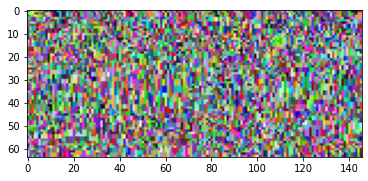

In [20]:
grains=np.array(labels).reshape((64,146))
print(len(labels))

colors=np.random.uniform(size=(n_clusters_,3))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(146):
        im[i,j]=colors[grains[i,j]]
plt.imshow(im)


(array([   0,    1,    2, ..., 5497, 5498, 5499]), array([3, 2, 1, ..., 1, 1, 1], dtype=int64))
0 5499
5500


(array([2.731e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.021e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.440e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.290e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.500e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.900e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        6.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

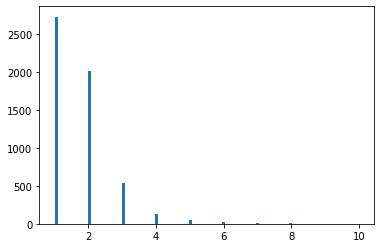

In [23]:
counts = np.unique(labels, return_counts=True)[1]
print(np.unique(labels, return_counts=True))
print(labels.min(),labels.max())
#for i in range(1020):
#    counts[i]=labels.c
print(len(counts))
plt.hist(counts,bins=100)

In [13]:
from sklearn.cluster import KMeans

n_clusters_=6000

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)
np.save("label%i"%n_clusters_,labels)


grains=np.array(labels).reshape((64,146))

colors=np.random.uniform(size=(n_clusters_,3))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(146):
        im[i,j]=colors[grains[i,j]]

print(silhouette_score(pca_features, labels))#, metric='euclidean'))

0.2857558794055405


In [14]:
from sklearn.cluster import KMeans

n_clusters_=7000

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)
np.save("label%i"%n_clusters_,labels)


grains=np.array(labels).reshape((64,146))

colors=np.random.uniform(size=(n_clusters_,3))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(146):
        im[i,j]=colors[grains[i,j]]

print(silhouette_score(pca_features, labels))#, metric='euclidean'))

0.24150822892626475


In [15]:
from sklearn.cluster import KMeans

n_clusters_=8000

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)
np.save("label%i"%n_clusters_,labels)


grains=np.array(labels).reshape((64,146))

colors=np.random.uniform(size=(n_clusters_,3))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(146):
        im[i,j]=colors[grains[i,j]]

print(silhouette_score(pca_features, labels))#, metric='euclidean'))

0.16864834525146655


In [11]:
from sklearn.cluster import KMeans

n_clusters_=9000

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)
np.save("label%i"%n_clusters_,labels)


grains=np.array(labels).reshape((64,146))

colors=np.random.uniform(size=(n_clusters_,3))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(146):
        im[i,j]=colors[grains[i,j]]

print(silhouette_score(pca_features, labels))#, metric='euclidean'))

0.05542191199738385


In [12]:
from sklearn.cluster import KMeans

n_clusters_=9344

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)
np.save("label%i"%n_clusters_,labels)


grains=np.array(labels).reshape((64,146))

colors=np.random.uniform(size=(n_clusters_,3))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(146):
        im[i,j]=colors[grains[i,j]]

print(silhouette_score(pca_features, labels))#, metric='euclidean'))

ValueError: Number of labels is 9344. Valid values are 2 to n_samples - 1 (inclusive)

True

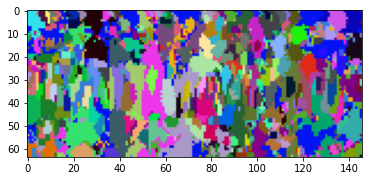

In [3]:
import cv2

img=im.copy()
img=np.rint(img*256).astype(np.uint8)
plt.imshow(img)
cv2.imwrite("K200.tiff", img)

[173  67  28 197  45  10  21  67  26  44  13  24  17  10  68  29  31  16
   7  35   9  12 121  98  17 112   7  10  68  59  14   9  18  14   8  19
   8   9  49  15 170  78  14 236   6  14  20  20  19  12  20   4  20  13
  16  18   2  32   5  13  37  17  65  27  20  40  15  18   6  17  34   6
 168  10   6 251  20  81  15 138  37  27 114 403  13  95  12  13   9  12
  90  80  30  56 112  85  12   3  20   3 133  80  28 128   8   2   8  38
  23  23  85  70   8  19  28 133  15 252  62  21  48  18  13  25   5  22
 373 142   3  12  25  12   8  24  10  38   7  33  50  22   8  28  26   7
  12  15  21  34  16  11  13  10  19  60  34  23   6  61   4  75   8  73
  19  33  16  39  35  84  29  57  81  23  19  63  66  13  10  18   8  10
  50  12  16  12  21  52  37 839  36  22  26 195  23   3   8   6  68  20
  97   7]


(array([43., 42., 35., 16.,  8.,  7.,  4., 10.,  3.,  8.,  1.,  3.,  0.,
         3.,  1.,  3.,  2.,  0.,  0.,  1.,  2.,  0.,  0.,  2.,  0.,  0.,
         0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  2.               ,  10.37             ,  18.74             ,
         27.11             ,  35.48             ,  43.849999999999994,
         52.22             ,  60.589999999999996,  68.96             ,
         77.33             ,  85.69999999999999 ,  94.07             ,
        102.44             , 110.80999999999999 , 119.17999999999999 ,
        127.54999999999998 , 135.92             , 144.29             ,
        

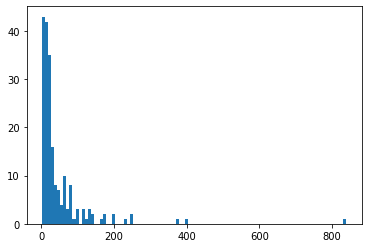

In [4]:
counts = np.unique(labels, return_counts=True)[1]
#for i in range(1020):
#    counts[i]=labels.c
print(counts)
plt.hist(counts,bins=100)

In [6]:
n_clusters_=250

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)

grains=np.array(labels).reshape((64,146))

colors=np.random.uniform(size=(n_clusters_,3))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(146):
        im[i,j]=colors[grains[i,j]]


True

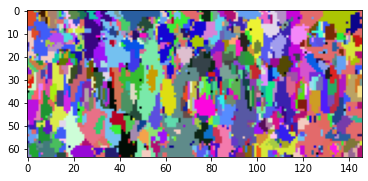

In [7]:
import cv2

img=im.copy()
img=np.rint(img*256).astype(np.uint8)
plt.imshow(img)
cv2.imwrite("K250.tiff", img)

[ 33  20 137   8  13  11  15 113   4  81  33  14 324   8   9  46  18   5
  21  24  15  40  12   9  15   2  17   9  16   9   9  61  16   9   7   9
  36  26   9  21   5   6   8  44  24  20   2   5 112  17  16 116 157  23
  23   7  19  13  48   8  46  13 132 103   6  29  22   5 123   7 104  25
   3 331  77  14  17 124  20  53   6 124  13  10  15  10  80  21  36   6
  27  21  21  39   9  12 175  15  73  38  47  55  10  39  63  16   4   7
   9  24  16  44   9  16  29  13  12  11   7 104  50  62  16   5  19 109
  24  41  38  11  33   5   3  12   5  25  81  19  20  44  28  18  15   9
  21  16   9  23  10  15   7  65   9   5  13  11  11 127  15  30  65  48
  11  15  21   4  12   4   3  23  14  19  12  40  25  56  92  14  32 138
   5  26  27  25  21   5  75   5  34  63  18  19  47   9  13  73  23  12
  20  33  36   6  17 199  25  14  23  24   6   8  35  10   6  24  11  65
  14  23  10  72 103  72  23  71 260  92  36  17 586  11  14  37   2  19
   7  17   7  10  35  47  12  13  16  21 103 124   

(array([36., 52., 40., 35.,  8., 14.,  7., 10.,  2.,  2.,  7.,  3.,  4.,
         3.,  0.,  2.,  0.,  5.,  2.,  2.,  5.,  1.,  1.,  2.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  2.               ,   7.84             ,  13.68             ,
         19.52             ,  25.36             ,  31.2              ,
         37.04             ,  42.879999999999995,  48.72             ,
         54.56             ,  60.4              ,  66.24             ,
         72.08             ,  77.92             ,  83.75999999999999 ,
         89.6              ,  95.44             , 101.28             ,
        

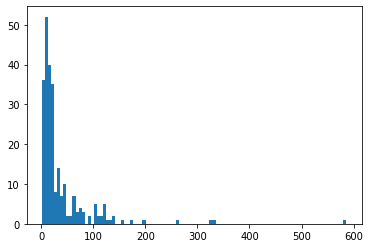

In [8]:
counts = np.unique(labels, return_counts=True)[1]
#for i in range(1020):
#    counts[i]=labels.c
print(counts)
plt.hist(counts,bins=100)

In [23]:
from sklearn.metrics import silhouette_score, silhouette_samples

ks=np.arange(90,330,20)
sqeuclidean=[]
euclidean=[]
for i in range(len(ks)):
    labels = KMeans(n_clusters=ks[i], init='k-means++').fit_predict(pca_features)
    sqeuclidean.append(silhouette_score(pca_features, labels, metric='sqeuclidean'))
    euclidean.append(silhouette_score(pca_features, labels, metric='euclidean'))


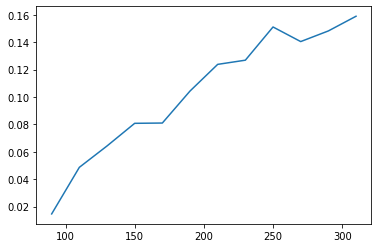

In [24]:
plt.plot(ks,sqeuclidean)

In [26]:
ks=np.arange(330,730,20)
sqeuclidean=[]
euclidean=[]
for i in range(len(ks)):
    labels = KMeans(n_clusters=ks[i], init='k-means++').fit_predict(pca_features)
    sqeuclidean.append(silhouette_score(pca_features, labels, metric='sqeuclidean'))
    euclidean.append(silhouette_score(pca_features, labels, metric='euclidean'))

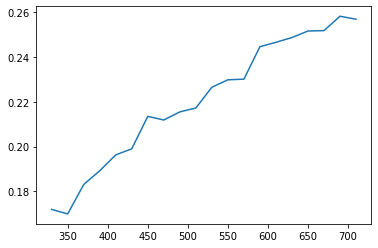

In [27]:
plt.plot(ks,sqeuclidean)

In [28]:
ks=np.arange(730,1030,20)
sqeuclidean=[]
euclidean=[]
for i in range(len(ks)):
    labels = KMeans(n_clusters=ks[i], init='k-means++').fit_predict(pca_features)
    sqeuclidean.append(silhouette_score(pca_features, labels, metric='sqeuclidean'))
    euclidean.append(silhouette_score(pca_features, labels, metric='euclidean'))

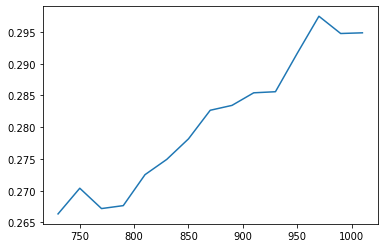

In [29]:
plt.plot(ks,sqeuclidean)

[11 11  5 ... 10  2  8]


(array([ 12., 115., 111.,  95.,  81.,   0.,  81.,  73.,  63.,  59.,  45.,
          0.,  35.,  22.,  22.,  29.,  22.,   0.,  18.,  14.,  10.,   9.,
          8.,   0.,   9.,   3.,   5.,  10.,   5.,   0.,   4.,   4.,   4.,
          4.,   3.,   0.,   2.,   0.,   1.,   5.,   1.,   0.,   3.,   2.,
          2.,   1.,   2.,   0.,   1.,   1.,   2.,   1.,   0.,   0.,   0.,
          2.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 1.               ,  1.83             ,  2.66             ,
         3.49             ,  4.32             ,  5.149999999999999,
         5.98             ,  6.81             ,  7.64             ,
         8.469999999999999,  9.299999999999999, 10.129999999999999,
        10.959999999999999, 11.79             

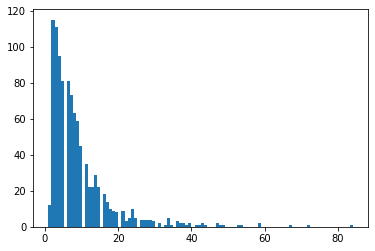

In [35]:
counts = np.unique(labels, return_counts=True)[1]
#for i in range(1020):
#    counts[i]=labels.c
print(counts)
plt.hist(counts,bins=100)

In [40]:
for i in range(1,counts.max()):
    print(len(np.where(counts==i)[0]))

12
115
111
95
81
81
73
63
59
45
35
22
22
29
22
18
14
10
9
8
9
3
5
10
5
4
4
4
4
3
2
0
1
5
1
3
2
2
1
2
1
1
2
1
0
0
2
1
1
0
0
0
1
1
0
0
0
0
2
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0


In [9]:
n_clusters_=1100

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)

grains=np.array(labels).reshape((64,146))

colors=np.random.uniform(size=(n_clusters_,3))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(146):
        im[i,j]=colors[grains[i,j]]


True

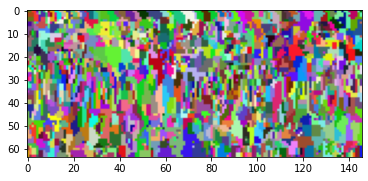

In [10]:
import cv2

img=im.copy()
img=np.rint(img*256).astype(np.uint8)
plt.imshow(img)
cv2.imwrite("K1100.tiff", img)

[ 8 19  9 ...  5  3  2]


(array([  9., 146., 128.,   0., 115.,  96.,   0.,  91.,  67.,   0.,  72.,
         55.,   0.,  50.,  33.,   0.,  33.,  26.,   0.,  22.,  22.,   0.,
         12.,  18.,   0.,  19.,  14.,   8.,   0.,   6.,   5.,   0.,   1.,
          5.,   0.,   4.,   3.,   0.,   3.,   1.,   0.,   2.,   2.,   0.,
          3.,   2.,   0.,   2.,   3.,   0.,   3.,   1.,   0.,   0.,   2.,
          1.,   0.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 1.               ,  1.68             ,  2.36             ,
         3.04             ,  3.72             ,  4.4              ,
         5.08             ,  5.760000000000001,  6.44             ,
         7.12             ,  7.800000000000001,  8.48             ,
         9.16             ,  9.84             

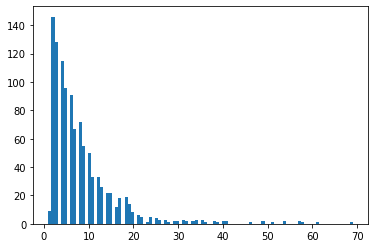

In [11]:
counts = np.unique(labels, return_counts=True)[1]
#for i in range(1020):
#    counts[i]=labels.c
print(counts)
plt.hist(counts,bins=100)

In [28]:
n_clusters_=5000

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)

grains=np.array(labels).reshape((64,146))

colors=np.random.uniform(size=(n_clusters_,3))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(146):
        im[i,j]=colors[grains[i,j]]

from sklearn.metrics import silhouette_score
print(labels)
print(silhouette_score(pca_features, labels, metric='euclidean'))

[1236 3417  179 ... 1785  767 2307]
0.3093660707310847


In [ ]:
n_clusters_=9344

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)
np.save("label%i"%n_clusters_,labels)

grains=np.array(labels).reshape((64,146))

colors=np.random.uniform(size=(n_clusters_,3))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(146):
        im[i,j]=colors[grains[i,j]]

print(labels)
print(silhouette_score(pca_features, labels, metric='euclidean'))


[1517 8214 1676 ... 1460 1861 6484]


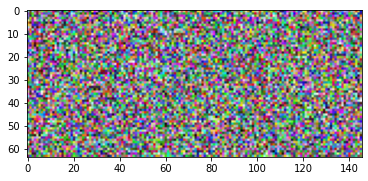

In [24]:
import cv2

img=im.copy()
img=np.rint(img*256).astype(np.uint8)
plt.imshow(img)
cv2.imwrite("K9344.tiff", img)

print(labels)

0 9343
9344


(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0., 9344.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.]),
 array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
        0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
        0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79

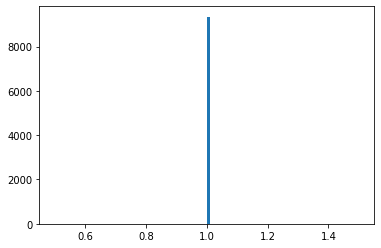

In [26]:
counts = np.unique(labels, return_counts=True)[1]
print(labels.min(),labels.max())
#for i in range(1020):
#    counts[i]=labels.c
print(len(counts))
plt.hist(counts,bins=100)

In [27]:
from sklearn.metrics import silhouette_score
print(labels)
print(silhouette_score(pca_features, labels, metric='euclidean'))

[1517 8214 1676 ... 1460 1861 6484]


ValueError: Number of labels is 9344. Valid values are 2 to n_samples - 1 (inclusive)